## DU Data Scientist project 2024
### Date: 2024-10-16
#### Author : Jonathan Kitt

## <u>Part 1 - Using the reciprocal of the cumulative distribution</u>

In [1]:
# Load the python libraries we will be using for the analysis

import numpy as np               # for calculations
import scipy as sp               # for scientific calculation
import matplotlib.pyplot as plt  # for plots

In [3]:
# Set random seed for reproducibility
np.random.seed(123)

In [5]:
# Define a percent point function

def ppf(x, lambda_val = 1):

    '''
    Calculate percent point (or quantile) function, or ppf
    for a vector of random probabilities

    ---------------
    Parameters
    ---------------
    
    x: vector of random probabilities
    
    lambda_val: parameter value (defaults to 1)

    ---------------
    Returns
    ---------------

    A vector of values resulting from applying a percent point function to a vector
    of probabilities for a given lambda parameter (defaults to 1)
    '''
    
    res = (np.log(x / (1 - x))) / lambda_val
    
    return res

### _Question 1_

In [7]:
# Generate a sample of 10**4 random probabilities p_k, uniformily distributed in [0, 1]

p_k = np.random.uniform(low = 0, high = 1, size = 10**4)

# Check the size of the sample we generated

print(len(p_k))

# Print the first five elements of the sample

print(p_k[0:5])

10000
[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]


In [9]:
# For each random value p_k, estimate x_k for a lambda parameter equal to 1

x_k = ppf(x = p_k)

# Print the first five elements of x_k

print(x_k[0:5])

[ 0.83054041 -0.91420892 -1.22617579  0.20598432  0.94182905]


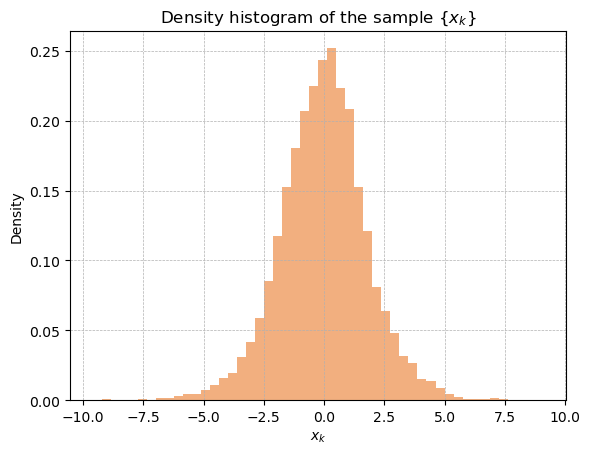

In [13]:
# Draw the density histogram of the sample x_k

plt.hist(x = x_k, bins = 50, color = '#e66100', density = True, alpha = 0.5)
plt.title('Density histogram of the sample {$x_k$}')
plt.xlabel('$x_k$')
plt.ylabel('Density')
plt.grid(linestyle = '--', linewidth = 0.5)

### _Question 2_

In [15]:
# Define a probability density function

def pdf(x, lambda_val = 1):
    '''
    Calculate probability density function, or pdf
    for a vector of random probabilities

    ---------------
    Parameters
    ---------------
    
    x: vector of random probabilities
    
    lambda_val: parameter value (defaults to 1)

    ---------------
    Returns
    ---------------

    A vector of values resulting from applying a probability density function to a vector
    of probabilities for a given lambda parameter (defaults to 1)
    '''
    res = (lambda_val / 4) * (1 / np.cosh(lambda_val * x / 2))**2
    return res

In [17]:
# Derive the explicit expression of the probability density function (pdf) on the x_k values for lambda = 1

f_x = pdf(x = x_k)

# Print the first five elements

print(f_x[0:5])

[0.21139986 0.20426362 0.17538987 0.24736679 0.20183337]


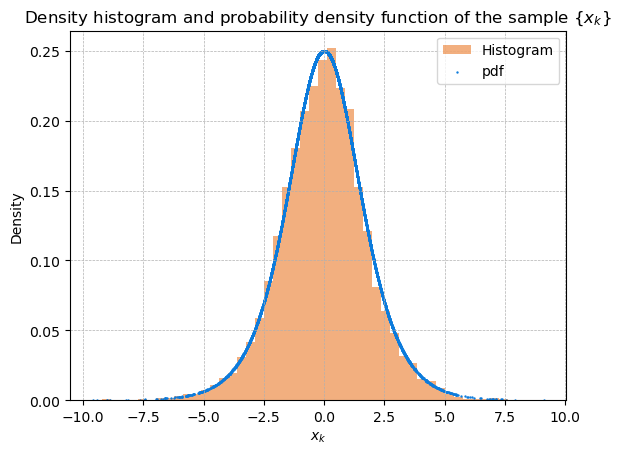

In [19]:
# Superimpose the f_x(x_k, 1) density curve on the sample histogram 

plt.hist(x = x_k, bins = 50, color = '#e66100', alpha = 0.5, density = True, label = 'Histogram')
plt.scatter(x = x_k, y = f_x, label = 'pdf', color = '#0c7bdc', s = 0.5)
plt.title('Density histogram and probability density function of the sample {$x_k$}')
plt.xlabel('$x_k$')
plt.ylabel('Density')
plt.legend()
plt.grid(linestyle = '--', linewidth = 0.5)

The density curve matches the density histogram rather well.

### _Question 3_

In [22]:
# Define function to calculate negative log-likelihood

def neg_ll(lambda_val, x):

    '''
    Calculate negative log-likelihood for a vector of random probabilities
    and a given lambda parameter

    ---------------
    Parameters
    ---------------
    
    x: vector of random probabilities
    
    lambda_val: parameter value

    ---------------
    Returns
    ---------------

    A vector of log likelihoods
    '''

    res = -np.sum(np.log(pdf(x, lambda_val)))

    return res

In [24]:
# Extract the ML estimator lambda_est that minimizes this function
# We use the minimize() function, from the SciPy 'optimize' module, with an initial guess (x0) of 1,
# and the 'Nelder-Mead' solver method.

fitres = sp.optimize.minimize(neg_ll, x0 = [1], args = (x_k), method = 'Nelder-Mead')

# Extract the estimator value for lambda from the fitres object

lambda_est = fitres.x[0]

print(f'The lambda estimator that minimizes the defined maximum likelihood function has a value of {lambda_est:.5f}')

The lambda estimator that minimizes the defined maximum likelihood function has a value of 1.00488


The lambda estimator value is very close to the expected value of 1.